In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
base_dir = Path('./imgdata/stitching_sets/mantis70/kunshan_jun14/')
lr_ind = [13]
hr_inds = [17, 8, 4, 3]

all_img_pathes = []
for img_dir in base_dir.iterdir():
    if img_dir.is_dir():
        all_img_pathes.append(img_dir / f'mcam_5013.jpeg')
        all_img_pathes.append(img_dir / 'mcam_5017.jpeg')
        all_img_pathes.append(img_dir / 'mcam_508.jpeg')
        all_img_pathes.append(img_dir / 'mcam_504.jpeg')
        all_img_pathes.append(img_dir / 'mcam_503.jpeg')
        
all_img_pathes.sort(key=lambda x: int(x.parent.stem))

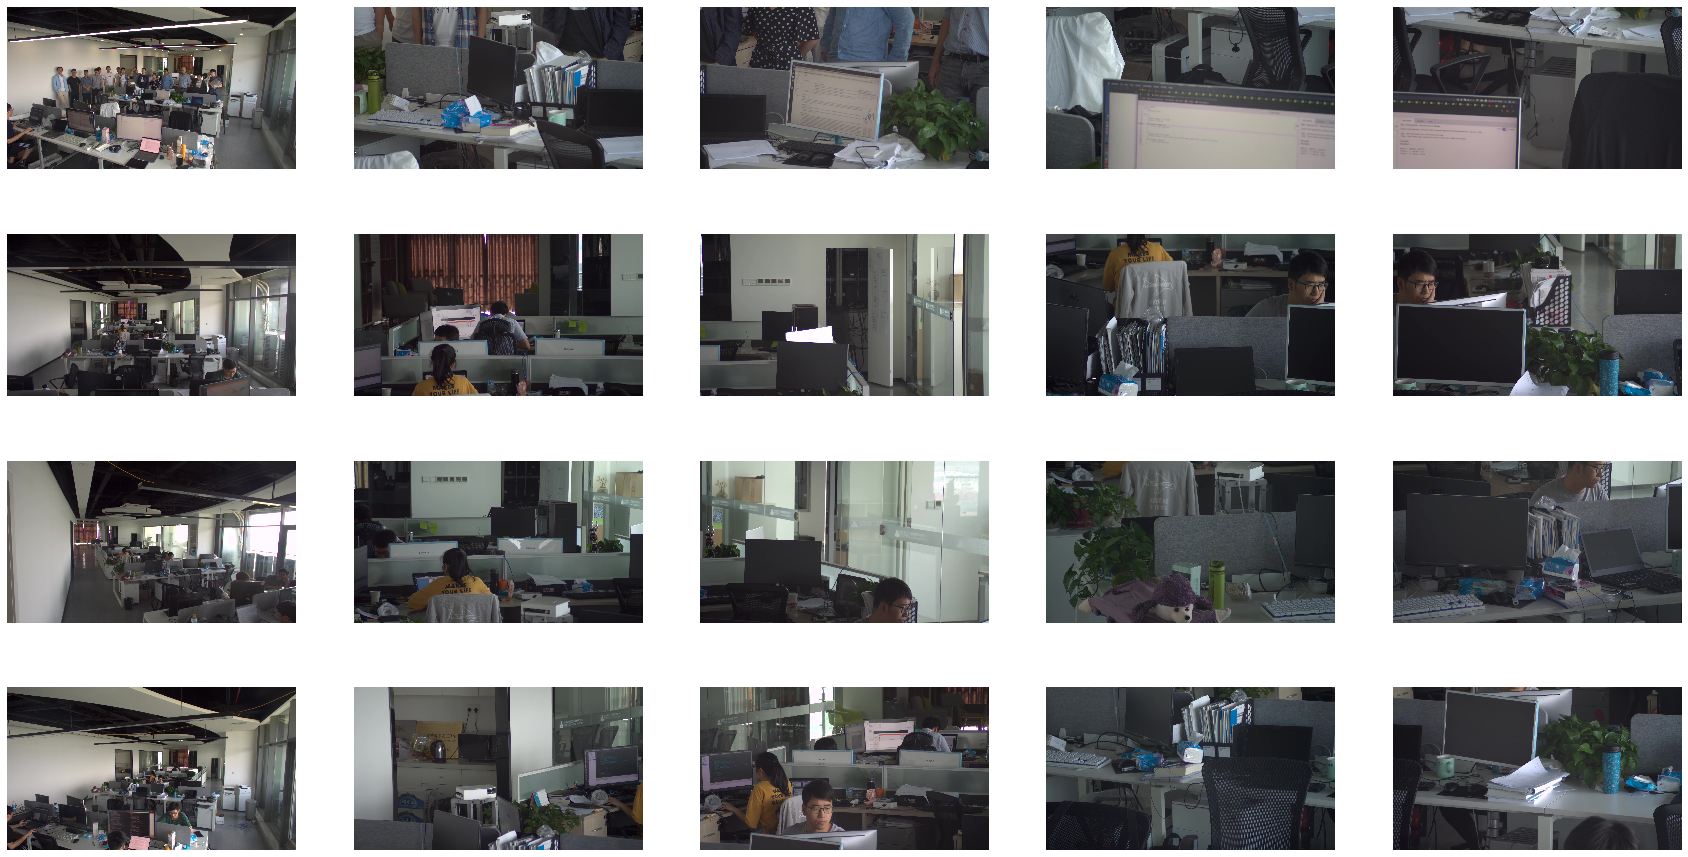

In [3]:
imgs = []
mark = 0
tmp = []

fig, axes = plt.subplots(4, 5, figsize=[30, 16])
for i, (ax, path) in enumerate(zip(axes.flatten(), all_img_pathes)):
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    tmp.append(img)
    if (i+1) % 5 == 0:
        imgs.append(tmp)
        tmp = []
    ax.imshow(img)
    ax.set_axis_off()
plt.show()

#### cv2.drawKeypoints(image, keypoints, outImage[, color[, flags]])
+ image:也就是原始图片
+ keypoints：从原图中获得的关键点，这也是画图时所用到的数据
+ outputimage：可为None
+ color：关键点颜色
+ flags：以不同的方式展示关键点
    + cv2.DRAW_MATCHES_FLAGS_DEFAULT 
    + cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    + cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
    + cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

#### cv2.xfeatures2d.SURF_create([, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]])
SURF在大致流程上与SIFT相似; SURF在尺度空间和关键点描述方面做了优化

+ hessianThreshold：H矩阵阈值，默认值100，大于该阈值的关键点将会被显示出来，推荐值范围300~500
+ extended：是否扩展SURF描述的维度，默认值False，扩展时将计算128维度的扩展描述，否则默认计算64维度的描述（速度快）
+ upright：是否计算SURF描述的方向，默认值False，不计算则运算速度较快
+ 其他参数不常用，且有各自的默认值

#### 计算关键点
#### surf.detect(image[, mask])

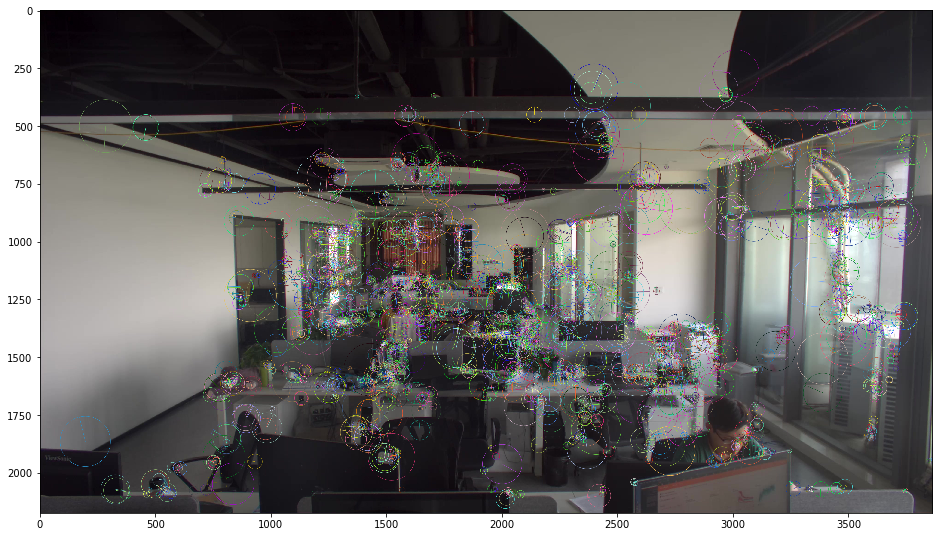

In [7]:
# opencv将SURF等算法整合到xfeatures2d集合里面了; upright = False
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=900, upright=False)
img_gray = cv2.cvtColor(imgs[1][0], cv2.COLOR_RGB2GRAY)

# 计算关键点
key_pts = surf.detect(img_gray, None)

# 展示关键点
img_copy = imgs[1][0].copy()
img_copy = cv2.drawKeypoints(img_copy, key_pts, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[16, 16])
plt.imshow(img_copy)
plt.show()

In [8]:
len(key_pts)

2658

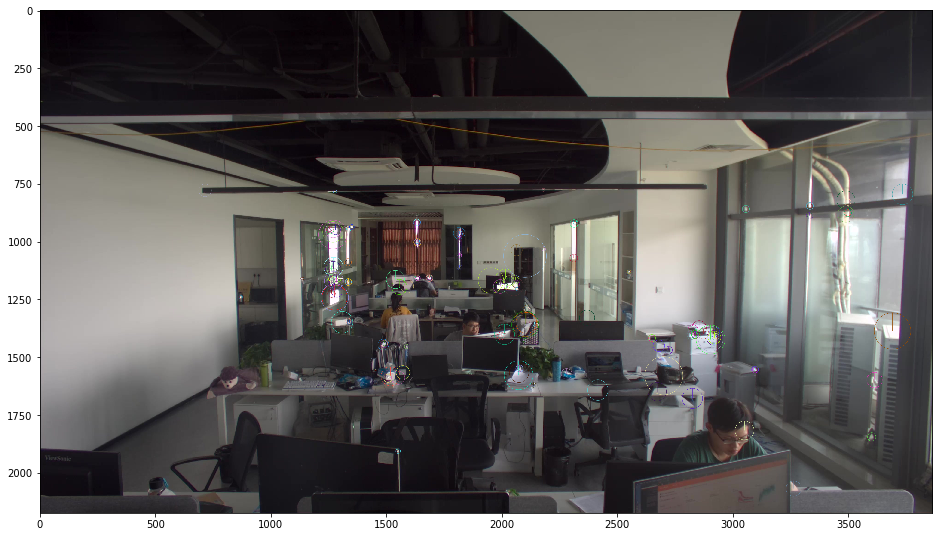

In [9]:
# opencv将SURF等算法整合到xfeatures2d集合里面了; upright = True
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=9000, upright=True)
img_gray = cv2.cvtColor(imgs[1][0], cv2.COLOR_RGB2GRAY)

# 计算关键点
key_pts = surf.detect(img_gray, None)

# 展示关键点
img_copy = imgs[1][0].copy()
img_copy = cv2.drawKeypoints(img_copy, key_pts, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[16, 16])
plt.imshow(img_copy)
plt.show()

#### 计算关键点描述符
#### surf.compute(image, keypoints[, descriptors])
+ Inputs:
    + image：
    + keypoints:关键点
+ Returns:
    + kp:关键点列表
    + description：关键点描述符【每个关键点用128维的向量表示】
    
    
#### 也可以使用surf.detectAndCompute()一步到位得到关键点和关键点描述符

In [18]:
kps, des = surf.compute(img_gray, key_pts)
print(kps)
print(des)

[<KeyPoint 0x7fc9a821f8d0>, <KeyPoint 0x7fc971232cf0>, <KeyPoint 0x7fc9712325a0>, <KeyPoint 0x7fc971232570>, <KeyPoint 0x7fc9713bbab0>, <KeyPoint 0x7fc9712bcb70>, <KeyPoint 0x7fc9712bc6f0>, <KeyPoint 0x7fc9712bc7e0>, <KeyPoint 0x7fc9712bc9f0>, <KeyPoint 0x7fc9712bcae0>, <KeyPoint 0x7fc9712bc990>, <KeyPoint 0x7fc9712bc8d0>, <KeyPoint 0x7fc9712bca50>, <KeyPoint 0x7fc9712bc9c0>, <KeyPoint 0x7fc9712bc750>, <KeyPoint 0x7fc9712bc8a0>, <KeyPoint 0x7fc9712bc960>, <KeyPoint 0x7fc9712bc6c0>, <KeyPoint 0x7fc9712bc720>, <KeyPoint 0x7fc9712bc840>, <KeyPoint 0x7fc9712bc270>, <KeyPoint 0x7fc9712bc7b0>, <KeyPoint 0x7fc9712bc810>, <KeyPoint 0x7fc9712bc690>, <KeyPoint 0x7fc9712bc900>, <KeyPoint 0x7fc9712bc660>, <KeyPoint 0x7fc9712bcf30>, <KeyPoint 0x7fc9712bc600>, <KeyPoint 0x7fc9712bc4b0>, <KeyPoint 0x7fc9712bc480>, <KeyPoint 0x7fc9712bc180>, <KeyPoint 0x7fc9712bc3c0>, <KeyPoint 0x7fc9712bc150>, <KeyPoint 0x7fc9712bcb10>, <KeyPoint 0x7fc9712bc5a0>, <KeyPoint 0x7fc9712bc570>, <KeyPoint 0x7fc9712bc630>, 